Name: Bhairavi Borade

Algorithms for Data Science

Final Project

Dataset: NYPD Arrest Data (Year to Date)

https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/about_data

In this project, my objective was to analyze and understand crime patterns in New York City using the NYPD Arrest Dataset. I approached the problem from two complementary angles — supervised learning to predict crime severity, and unsupervised learning to discover crime hotspots

Problem Statement:

Multi-Class Classification:
                       Predicting the Severity of the Crime.(Felony/Misdemeanor/Violiation)
                       

Clustering:
       Finding out the Crime Hotspots based on Boroughs.(Manhattan, Brooklyn, Bronx, Queens, Staten Island)

#Importing Libraries

In [ ]:
#Importing Libraries required for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Importing Dataset

In [ ]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250508.csv')

#Data Pre-processing

In [ ]:
#Printing the data frame.
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71237,303938395,03/31/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,34,0,18-24,M,BLACK HISPANIC,1004367,254624,40.865536,-73.927268,POINT (-73.9272684 40.86553571)
71238,303885891,03/30/2025,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,43,1,18-24,F,BLACK,1022565,242793,40.833003,-73.861542,POINT (-73.8615425 40.83300293)
71239,303937884,03/31/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553501,F,M,13,0,25-44,M,WHITE HISPANIC,988986,207106,40.735143,-73.982909,POINT (-73.982909 40.735143)
71240,303887215,03/30/2025,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,47,1,25-44,M,BLACK,1022187,261218,40.883576,-73.862804,POINT (-73.86280418 40.8835756)


df.columns: Lists all column names in the dataset.

df.info(): Gives detailed info about each column including:

In [ ]:
#Printing out the columns of the dataset
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
#Printing all information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71242 non-null  int64  
 1   ARREST_DATE               71242 non-null  object 
 2   PD_CD                     71242 non-null  int64  
 3   PD_DESC                   71242 non-null  object 
 4   KY_CD                     71238 non-null  float64
 5   OFNS_DESC                 71242 non-null  object 
 6   LAW_CODE                  71242 non-null  object 
 7   LAW_CAT_CD                70881 non-null  object 
 8   ARREST_BORO               71242 non-null  object 
 9   ARREST_PRECINCT           71242 non-null  int64  
 10  JURISDICTION_CODE         71242 non-null  int64  
 11  AGE_GROUP                 71242 non-null  object 
 12  PERP_SEX                  71242 non-null  object 
 13  PERP_RACE                 71242 non-null  object 
 14  X_COOR

Insights from Output:
The dataset contains 71,242 records and 19 columns.

Some columns like LAW_CAT_CD have missing values (70881 < 71242), which need to be handled.

Many columns are of type object (i.e., strings), indicating the need for encoding or processing.

this cell performs a statistical summary of numeric columns using .describe().

In [ ]:
#Printing the numerical means
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.124200e+04,71242.000000,71238.000000,71242.000000,71242.000000,7.124200e+04,71242.000000,71242.000000,71242.000000
mean,3.011852e+08,457.727619,262.005334,63.274080,0.872547,1.002424e+06,206818.886191,40.613647,-73.701442
std,1.495442e+06,274.387400,148.788670,34.977293,6.447428,5.899169e+04,31785.157626,2.230782,4.046217
min,2.987043e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252488
25%,2.999070e+08,205.000000,117.000000,40.000000,0.000000,9.904290e+05,184554.500000,40.673189,-73.977394
50%,3.011167e+08,439.000000,341.000000,62.000000,0.000000,1.004928e+06,206536.000000,40.733497,-73.924883
75%,3.023205e+08,729.000000,344.000000,101.000000,0.000000,1.017426e+06,235883.000000,40.814105,-73.879171
max,3.040454e+08,969.000000,995.000000,123.000000,97.000000,1.067185e+06,271303.000000,40.911307,0.000000


In [ ]:
#Checking the dataset for NULL Values
df.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
PD_CD,0
PD_DESC,0
KY_CD,4
OFNS_DESC,0
LAW_CODE,0
LAW_CAT_CD,361
ARREST_BORO,0
ARREST_PRECINCT,0


In [ ]:
columns_to_drop = [
    'ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE',
    'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column'
]
df_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
#Remove rows with missing crime category
df_cleaned = df_cleaned.dropna(subset=['LAW_CAT_CD'])

In [ ]:
#Keep only valid crime classes
valid_classes = ['F', 'M', 'V']
df_cleaned = df_cleaned[df_cleaned['LAW_CAT_CD'].isin(valid_classes)]

In [ ]:
# Update age group before encoding: convert '<18' to '0-17'
df_cleaned['AGE_GROUP'] = df_cleaned['AGE_GROUP'].replace('<18', '0-17')

In [ ]:
# Re-encode with updated age groups
df_encoded = df_cleaned.copy()
label_encoders = {}
categorical_cols = ['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'ARREST_BORO']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le



In [ ]:
# Show updated encoded AGE_GROUP values and unique classes
encoded_age_groups = df_encoded['AGE_GROUP'].unique()
decoded_age_groups = label_encoders['AGE_GROUP'].inverse_transform(encoded_age_groups)

list(zip(encoded_age_groups, decoded_age_groups))

[(np.int64(2), '25-44'),
 (np.int64(3), '45-64'),
 (np.int64(0), '0-17'),
 (np.int64(1), '18-24'),
 (np.int64(4), '65+')]

#EDA

<ipython-input-14-9816aa0bc24b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='LAW_CAT_CD', order=['F', 'M', 'V'], palette='Set2')


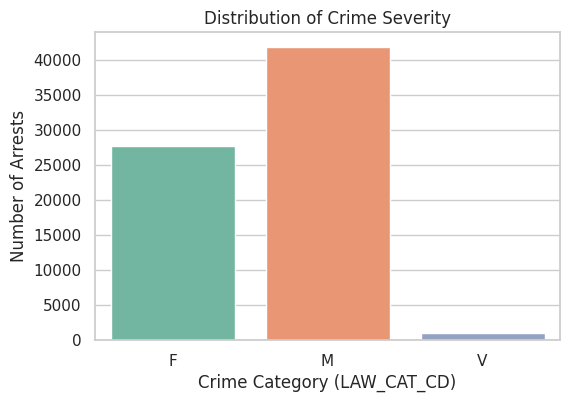

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# 1. Crime Severity Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='LAW_CAT_CD', order=['F', 'M', 'V'], palette='Set2')
plt.title('Distribution of Crime Severity')
plt.xlabel('Crime Category (LAW_CAT_CD)')
plt.ylabel('Number of Arrests')
plt.show()

sns.countplot() to show the number of arrests in each crime severity class:

F = Felony

M = Misdemeanor

V = Violation

Crime Class Distribution:

Misdemeanors are the most common (~60%)

Felonies make up a significant portion

Violations are rare



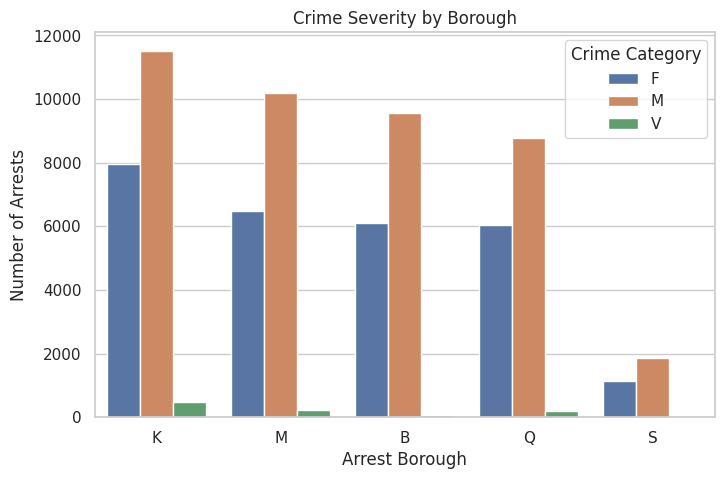

In [ ]:
# 2. Crime Severity vs Borough
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='ARREST_BORO', hue='LAW_CAT_CD', order=df_cleaned['ARREST_BORO'].value_counts().index)
plt.title('Crime Severity by Borough')
plt.xlabel('Arrest Borough')
plt.ylabel('Number of Arrests')
plt.legend(title='Crime Category')
plt.show()


Borough-Wise Crime Severity:

Brooklyn and Manhattan have the most arrests.

Felonies are more prevalent in Brooklyn and Bronx.

Staten Island shows much fewer cases overall.

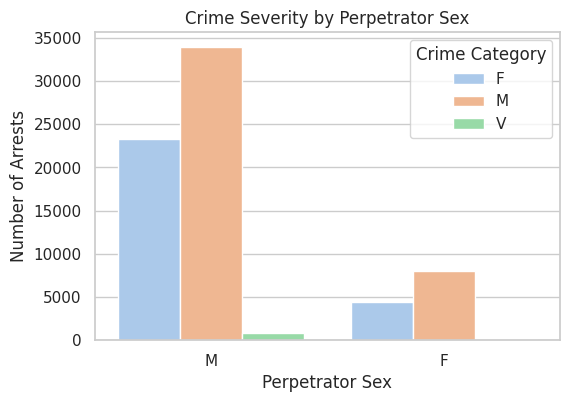

In [ ]:
# 3. Crime Severity vs Perpetrator Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='PERP_SEX', hue='LAW_CAT_CD', palette='pastel')
plt.title('Crime Severity by Perpetrator Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Number of Arrests')
plt.legend(title='Crime Category')
plt.show()

Gender vs Crime Type:

Males dominate all severity categories.

Female arrests are more skewed toward misdemeanors.

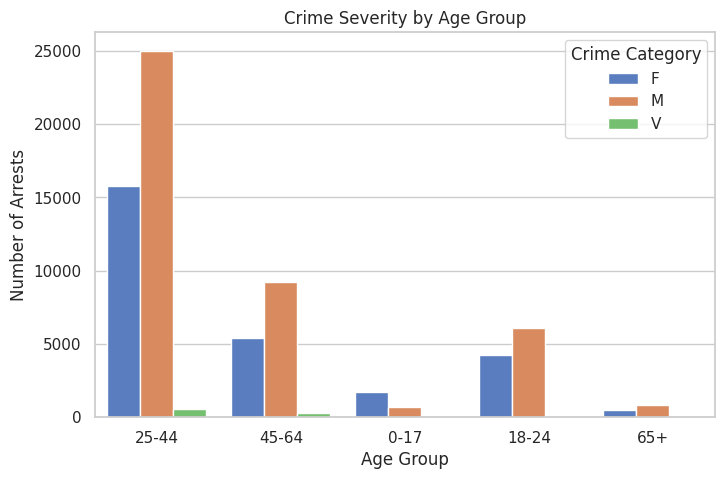

In [ ]:
# 4. Crime Severity vs Age Group
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='AGE_GROUP', hue='LAW_CAT_CD', palette='muted')
plt.title('Crime Severity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.legend(title='Crime Category')
plt.show()

 Age Group vs Severity:

Ages 25–44 have the highest number of arrests across all categories.

Minors (0–17) have a low but non-trivial number of felonies and misdemeanors.


#Identifies the top 10 most common OFNS_DESC (offense descriptions).

Uses countplot with hue='LAW_CAT_CD' to show how each offense type splits into Felony (F), Misdemeanor (M), and Violation (V).

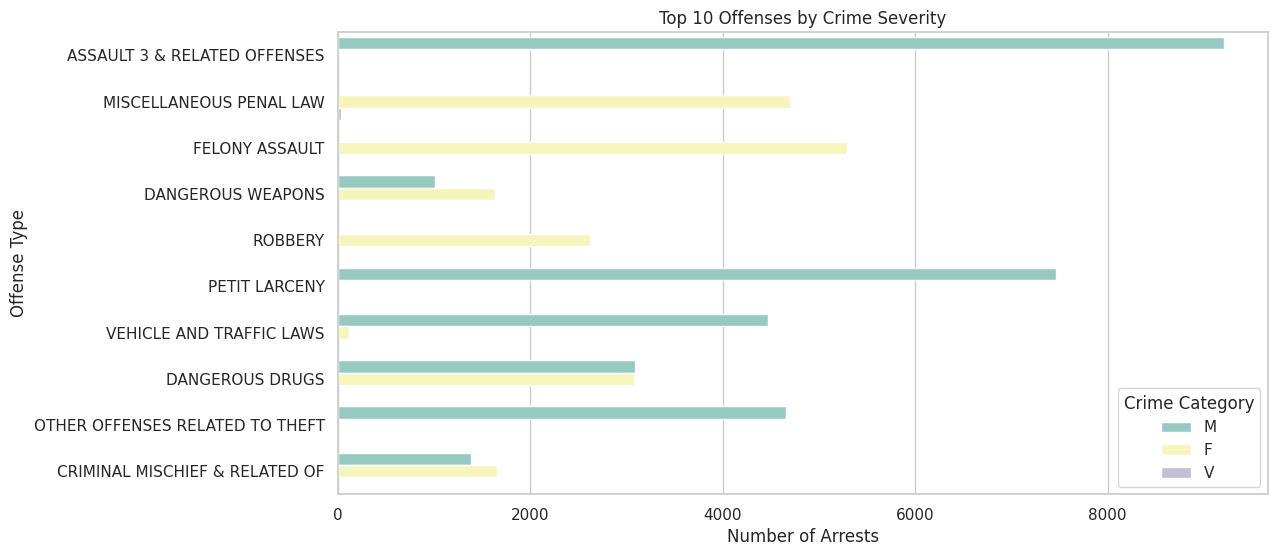

In [ ]:
# 5. Top 10 Offense Types by Count and their Severity
top_offenses = df_cleaned['OFNS_DESC'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned[df_cleaned['OFNS_DESC'].isin(top_offenses)],
              y='OFNS_DESC', hue='LAW_CAT_CD', palette='Set3')
plt.title('Top 10 Offenses by Crime Severity')
plt.xlabel('Number of Arrests')
plt.ylabel('Offense Type')
plt.legend(title='Crime Category')
plt.show()

 Top Offenses by Severity:

Crimes like Assault, Petit Larceny, and Drug Offenses span all categories.

Felony Assault and Robbery lean heavily toward felony charges.

#MODEL TRAINING AND EVALUATION

Decision Tree

stratify=y_encoded ensures class proportions are maintained — important due to class imbalance.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
X = df_encoded.drop(columns=['LAW_CAT_CD', 'ARREST_DATE', 'Latitude', 'Longitude'])  # Drop non-predictive and clustering columns
y = df_encoded['LAW_CAT_CD']

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)



Builds a Decision Tree classifier, fits it to training data, and predicts on test data.

classification_report() – Generates metrics like precision, recall, and F1-score for each class (F, M, V).

confusion_matrix() – Summarizes predictions vs actuals.


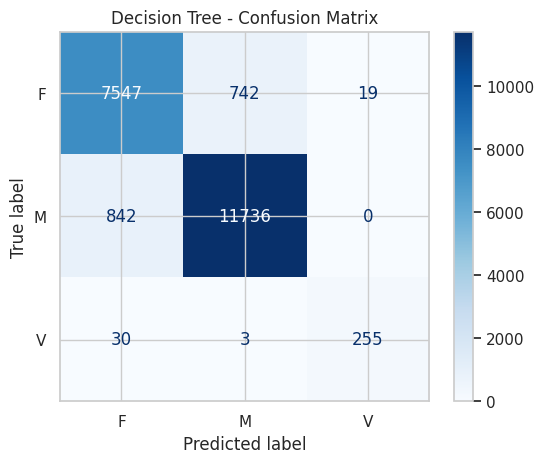

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           F       0.90      0.91      0.90      8308
           M       0.94      0.93      0.94     12578
           V       0.93      0.89      0.91       288

    accuracy                           0.92     21174
   macro avg       0.92      0.91      0.92     21174
weighted avg       0.92      0.92      0.92     21174



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation report
report_dt = classification_report(y_test, y_pred_dt, target_names=target_encoder.classes_)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_dt, display_labels=target_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Show classification report
print("=== Decision Tree Classification Report ===")
print(report_dt)

Row 1: Actual Felonies

➡️ Insight: The model struggles a bit to distinguish between felony and misdemeanor, which may have similar features (e.g., same offense type, age group).

🔹 Row 2: Actual Misdemeanors

➡️ Insight: Very strong performance, but again, some confusion with felonies, likely due to feature overlap.

🔹 Row 3: Actual Violations

➡️ Insight: Despite very low support (only 288 cases), the model does surprisingly well. Only ~11% error, which is impressive on small data.



 Classification Report:

 Felony (F)
Precision = 0.90: 10% of predicted felonies were actually something else.

Recall = 0.91: 91% of all real felonies were correctly identified.

F1 = 0.90: Strong, balanced performance.

🔹 Misdemeanor (M)
Highest support (12,578 instances)

Precision and recall both above 0.93 — best performing class overall.

🔹 Violation (V)
Low support (only 288 samples), but still performs very well:

F1-score = 0.91 despite fewer training examples.

Indicates the model learned its patterns clearly.

Macro Average (0.92)
Takes the average of precision, recall, and F1 across all classes equally — treats all classes without bias toward size.

Shows that each class is being modeled fairly well, including the underrepresented Violation class.

Weighted Average (0.92)
Takes class imbalance into account — larger classes contribute more to the average.

Confirms the model is doing well overall, not just on the dominant class.

Random Forest

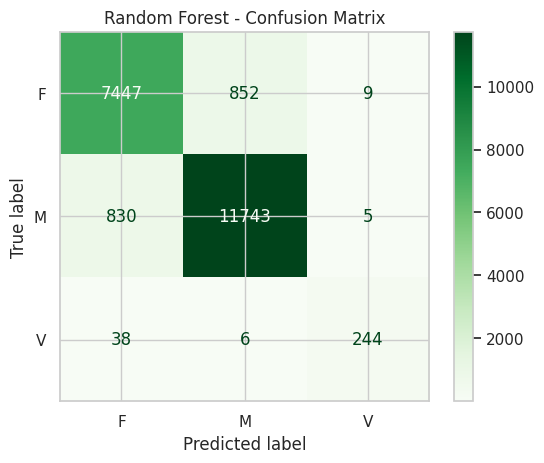

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           F       0.90      0.90      0.90      8308
           M       0.93      0.93      0.93     12578
           V       0.95      0.85      0.89       288

    accuracy                           0.92     21174
   macro avg       0.92      0.89      0.91     21174
weighted avg       0.92      0.92      0.92     21174



In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation report
report_rf = classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf, display_labels=target_encoder.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Show classification report
print("=== Random Forest Classification Report ===")
print(report_rf)

<ipython-input-22-a33577578334>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(10), x='Importance', y='Feature', palette='viridis')


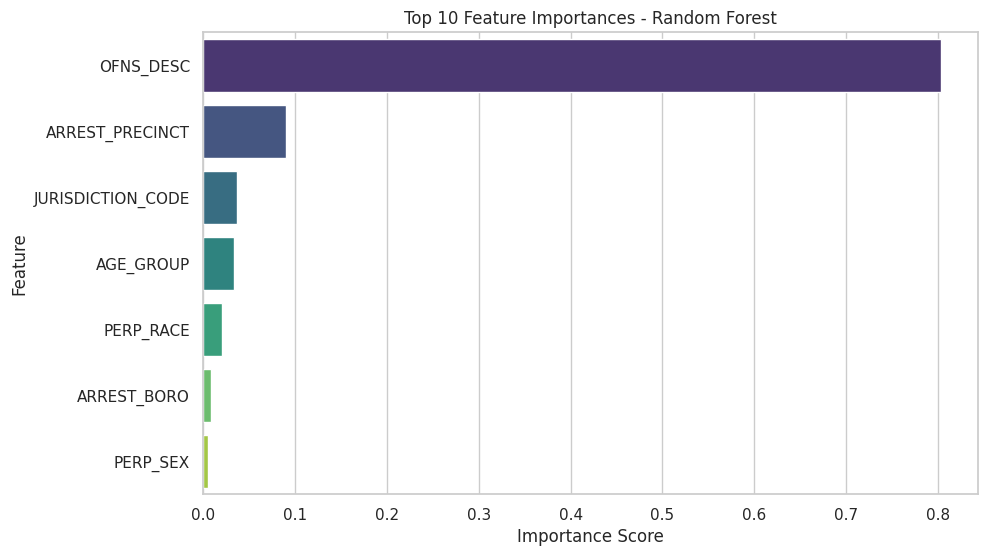

,Feature,Importance
0,OFNS_DESC,0.803420
2,ARREST_PRECINCT,0.090491
3,JURISDICTION_CODE,0.037083
4,AGE_GROUP,0.033874
6,PERP_RACE,0.020951
1,ARREST_BORO,0.008793
5,PERP_SEX,0.005389


In [ ]:
# View feature importance for the trained Random Forest model

importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for easy plotting
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

importances_df.head(10)

The type of offense (OFNS_DESC) is by far the most influential factor in determining crime severity.

Location (ARREST_PRECINCT) and jurisdiction follow.

Demographics (age, race, sex) play a smaller role comparatively.

#Unsupervised Learning - Clustering(Kmeans)

In [ ]:
from sklearn.cluster import KMeans
# Filter valid coordinates
df_geo = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

# Clustering
coords = df_geo[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_geo['Cluster'] = kmeans.fit_predict(coords)

<ipython-input-24-864cd33bdc7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['Cluster'] = kmeans.fit_predict(coords)


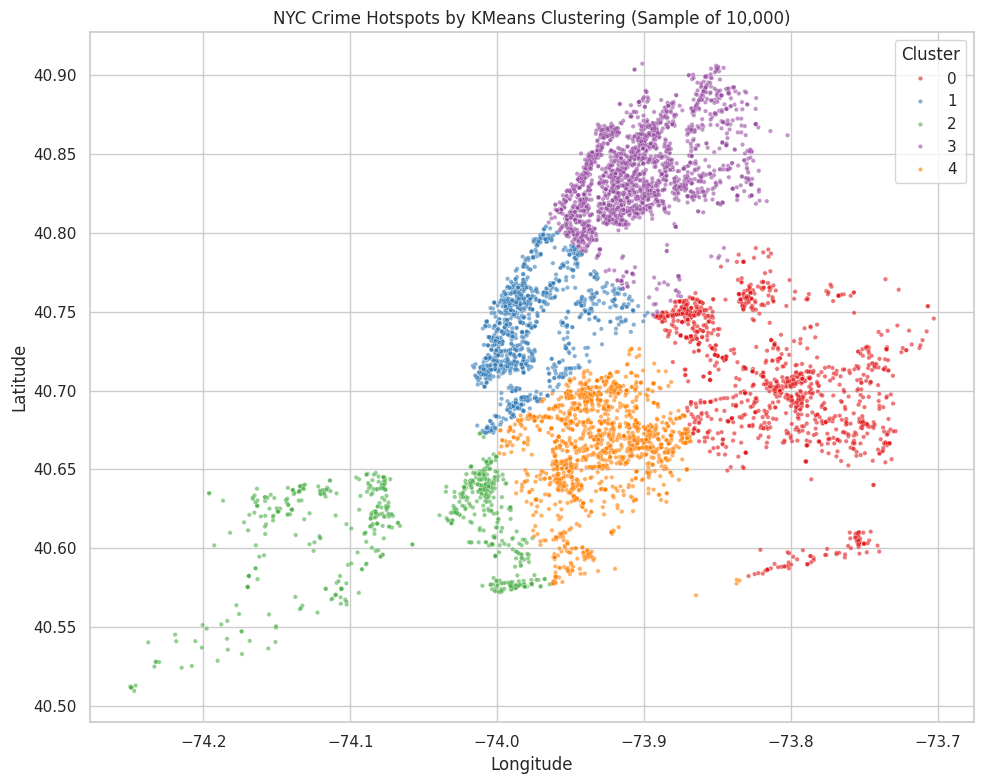

In [ ]:
# Plot clusters inline in Colab
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_geo.sample(n=10000, random_state=42),
    x='Longitude', y='Latitude', hue='Cluster',
    palette='Set1', s=10, alpha=0.6
)
plt.title('NYC Crime Hotspots by KMeans Clustering (Sample of 10,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot visualizes the NYC crime hotspots based on arrest locations. Using KMeans, we identified 5 spatial clusters. Each cluster groups arrests that are geographically close to one another.”

| Cluster        | Visual                   | Likely Borough (Roughly based on location) | Insight                                            |
| -------------- | ------------------------ | ------------------------------------------ | -------------------------------------------------- |
| **0 (Red)**    | Right side, east-central | Queens / Eastern Brooklyn                  | Dense urban crime region.                          |
| **1 (Blue)**   | Upper-central            | Bronx / Upper Manhattan                    | Second major hotspot — dense high-crime corridors. |
| **2 (Green)**  | Lower-left               | Staten Island or South Brooklyn            | Sparse — fewer crimes or lower density.            |
| **3 (Purple)** | Top-most                 | Northern Bronx                             | High-volume but more spread out.                   |
| **4 (Orange)** | Center                   | Brooklyn/Manhattan border                  | Core city zone — expected crime concentration.     |


Clusters toward the city center — like 0 and 4 — indicate more concentrated crime activity, possibly due to higher population density and urban dynamics. On the other hand, Cluster 2 appears more spread out and may cover lower-incident regions like Staten Island or the outer edges of Brooklyn.

In [ ]:
# Output to confirm 'Cluster' column exists
df_geo[['Latitude', 'Longitude', 'ARREST_BORO', 'Cluster']].head()

,Latitude,Longitude,ARREST_BORO,Cluster
1,40.794755,-73.942348,M,3
3,40.680086,-73.775931,Q,0
4,40.715526,-74.001238,M,1
6,40.722641,-73.851542,Q,0
7,40.814853,-73.956314,M,3


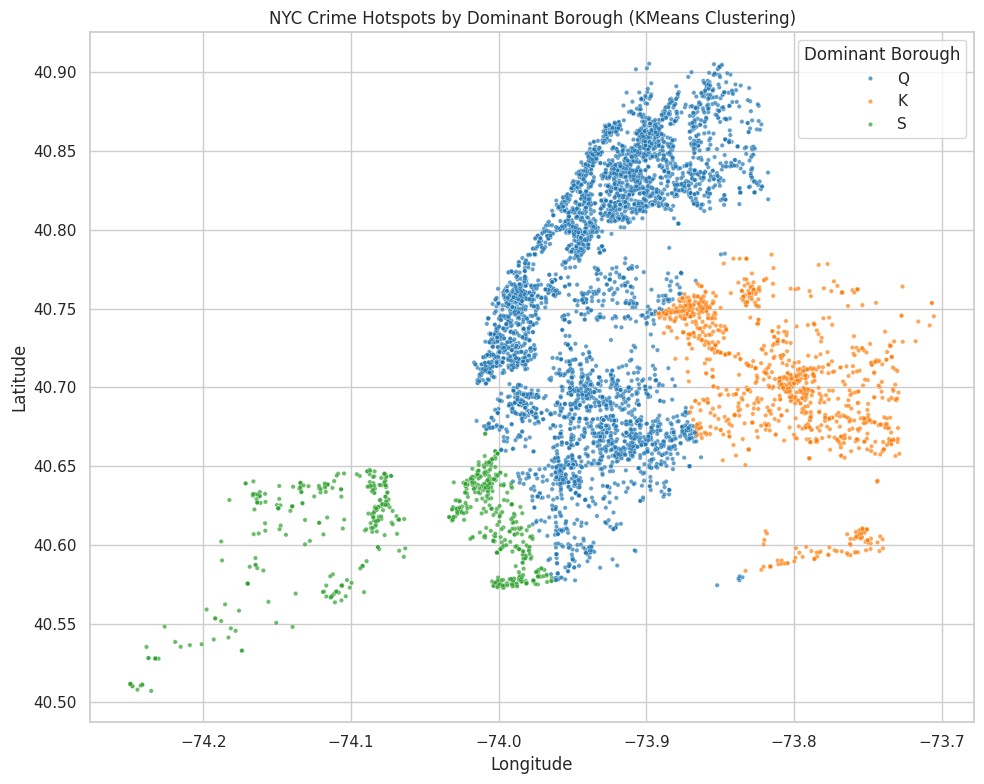

In [ ]:
# Map clusters to dominant boroughs
cluster_borough = (
    df_geo.groupby(['Cluster', 'ARREST_BORO'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Cluster', 'Count'], ascending=[True, False])
)
cluster_to_borough = dict(zip(cluster_borough['Cluster'], cluster_borough['ARREST_BORO']))
df['Cluster_Label'] = df_geo['Cluster'].map(cluster_to_borough)

# Plot scatter with annotated boroughs
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df.sample(n=10000, random_state=42),
    x='Longitude', y='Latitude', hue='Cluster_Label',
    palette='tab10', s=10, alpha=0.7
)
plt.title('NYC Crime Hotspots by Dominant Borough (KMeans Clustering)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Dominant Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

Boroughs shown are:

Q = Queens (🟦 Blue)

K = Brooklyn (🟧 Orange)

S = Staten Island (🟩 Green)

| Borough (Label)       | Cluster Characteristics                                                                                             |
| --------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Queens (Q)**        | Largest cluster by area and arrest density. Highly urban and well-connected — may need broader crime interventions. |
| **Brooklyn (K)**      | Second-highest concentration, mostly centered around urban zones. Clearly a hotspot.                                |
| **Staten Island (S)** | Lowest density but still forms a spatial cluster — crime here is more spread out.                                   |


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

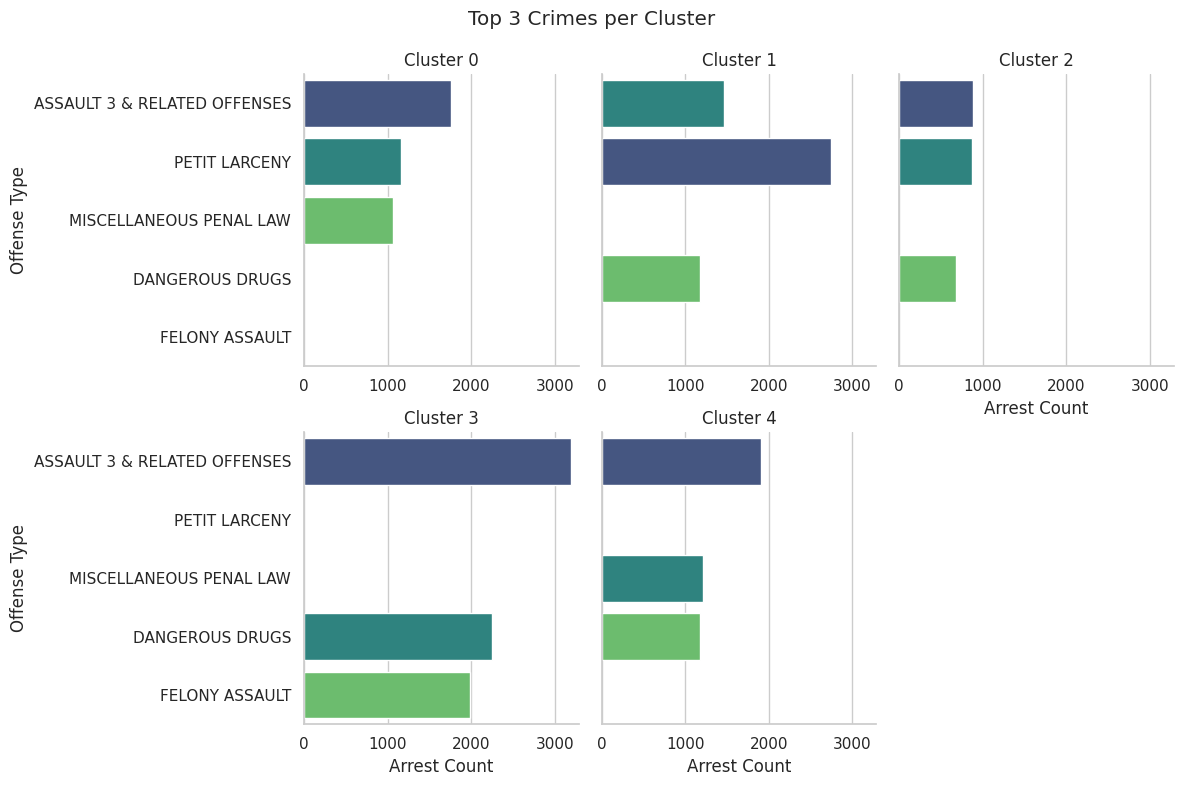

In [ ]:
# Get top 3 crimes per cluster
top_crimes = (
    df_geo.groupby(['Cluster', 'OFNS_DESC'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Cluster', 'Count'], ascending=[True, False])
    .groupby('Cluster')
    .head(3)
)

# Create barplot grid
g = sns.FacetGrid(top_crimes, col="Cluster", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.barplot, x="Count", y="OFNS_DESC", palette='viridis')
g.set_titles("Cluster {col_name}")
g.set_axis_labels("Arrest Count", "Offense Type")
g.set(xlim=(0, top_crimes["Count"].max() + 100))
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 3 Crimes per Cluster")
plt.show()

| Cluster | Top Crime                                         | Insight                                                        |
| ------- | ------------------------------------------------- | -------------------------------------------------------------- |
| **0**   | Assault 3, Petit Larceny, Miscellaneous Penal Law | May be focused on physical confrontations & petty theft        |
| **1**   | Petit Larceny, Assault, Dangerous Drugs           | Property + violent + drug-related mix                          |
| **2**   | Evenly distributed among lower counts             | Likely a lower-crime region                                    |
| **3**   | Assault 3, Dangerous Drugs, Felony Assault        | Serious hotspot — includes high-severity crimes                |
| **4**   | Assault 3, Petit Larceny, Felony Assault          | Similar to cluster 3 — urban zone with both theft and violence |


<ipython-input-29-8f58efb222f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['ARREST_DATE'] = pd.to_datetime(df_geo['ARREST_DATE'])
<ipython-input-29-8f58efb222f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['Month'] = df_geo['ARREST_DATE'].dt.month_name()
<ipython-input-29-8f58efb222f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

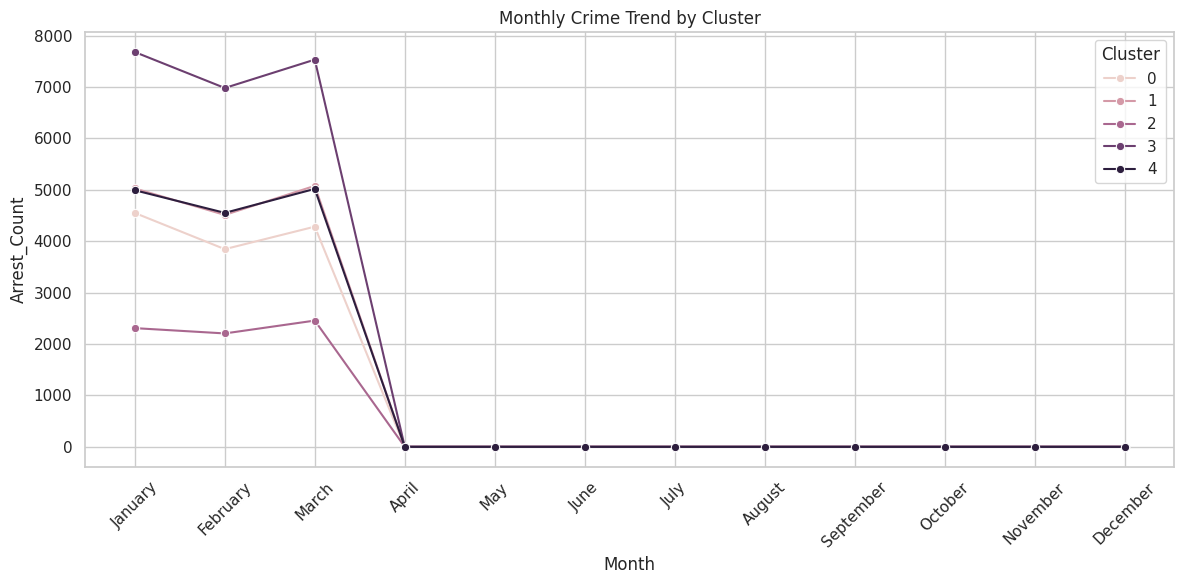

In [ ]:
# Parse date and extract month and weekday
df_geo['ARREST_DATE'] = pd.to_datetime(df_geo['ARREST_DATE'])
df_geo['Month'] = df_geo['ARREST_DATE'].dt.month_name()
df_geo['Weekday'] = df_geo['ARREST_DATE'].dt.day_name()

# Define order for plotting
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday',
    'Friday', 'Saturday', 'Sunday'
]
df_geo['Month'] = pd.Categorical(df_geo['Month'], categories=month_order, ordered=True)
df_geo['Weekday'] = pd.Categorical(df_geo['Weekday'], categories=weekday_order, ordered=True)

# Group by cluster and month
cluster_month_counts = (
    df_geo.groupby(['Cluster', 'Month'])
    .size()
    .reset_index(name='Arrest_Count')
)

# Group by cluster and weekday
cluster_weekday_counts = (
    df_geo.groupby(['Cluster', 'Weekday'])
    .size()
    .reset_index(name='Arrest_Count')
)

# Plot: Monthly trend per cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=cluster_month_counts, x='Month', y='Arrest_Count', hue='Cluster', marker='o')
plt.title('Monthly Crime Trend by Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



This plot shows how arrest activity fluctuated across months for each cluster. Most clusters followed a similar trend — arrests peaked between January and March but dropped sharply starting in April. This suggests either:

A data cutoff — our dataset might only include data until early April.

A seasonal or external factor such as policy change or reporting delay.”

| Cluster           | Observation                                                                                                              |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Cluster 3 & 4** | Consistently show the **highest arrest volumes**, indicating they are the most crime-prone zones.                        |
| **Cluster 2**     | Always shows the **lowest crime activity**, likely a low-density or low-crime area.                                      |
| **All clusters**  | Share a similar dip after March — most likely a **dataset time window issue** (check if only Jan–Mar data is available). |


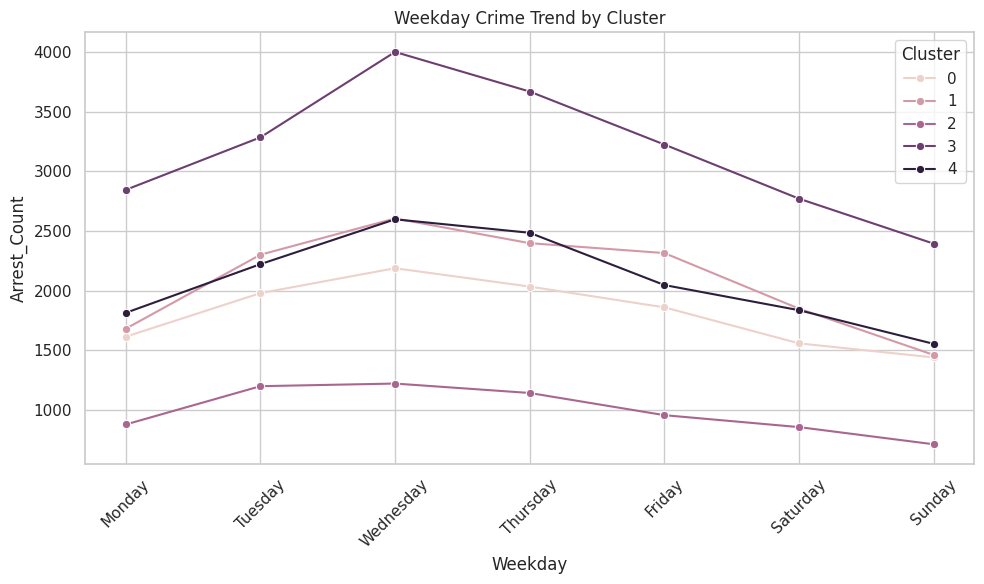

In [ ]:
# Plot: Weekday trend per cluster
plt.figure(figsize=(10, 6))
sns.lineplot(data=cluster_weekday_counts, x='Weekday', y='Arrest_Count', hue='Cluster', marker='o')
plt.title('Weekday Crime Trend by Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

| Observation                | Interpretation                                                                                                                                     |
| -------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Peak on Wednesday**      | Most clusters see the **highest arrest volume midweek**, especially Cluster 3, which tops around 4,000 arrests.                                    |
| **Drop on weekends**       | Across all clusters, crime **declines on Saturday and Sunday** — possibly due to reduced reporting, policing patterns, or actual behavior changes. |
| **Cluster 3 dominates**    | Consistently has the **highest arrest count every day**, reinforcing it as a crime-heavy zone.                                                     |
| **Cluster 2 stays lowest** | Very minimal daily variation — lowest crime activity throughout the week.                                                                          |


#Crime Severity per Cluster (F / M / V)

Compares how many Felonies (F), Misdemeanors (M), and Violations (V) occurred in each cluster.



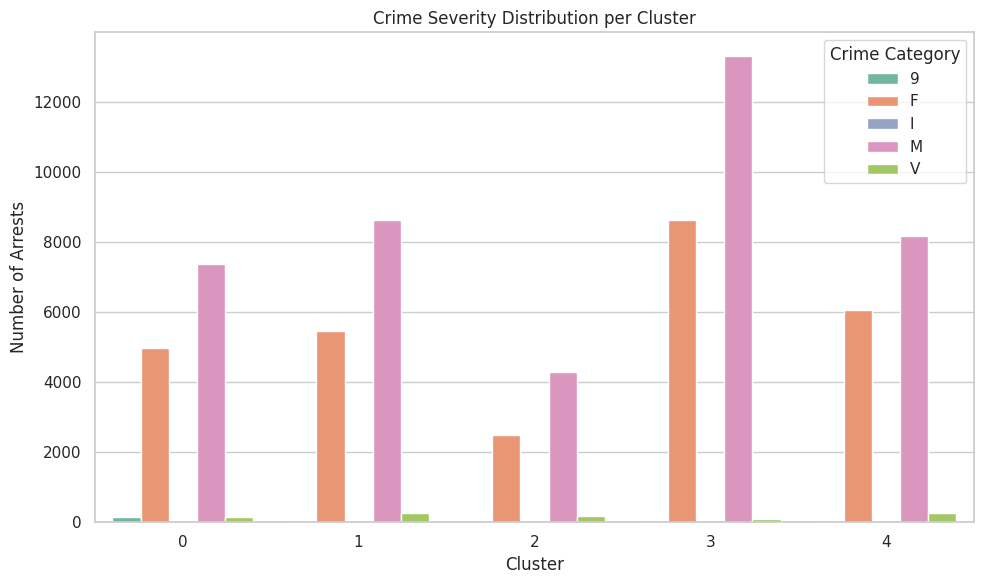

In [ ]:
# Group by cluster and LAW_CAT_CD
severity_counts = (
    df_geo.groupby(['Cluster', 'LAW_CAT_CD'])
    .size()
    .reset_index(name='Count')
)

# Plot: Crime Severity per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=severity_counts, x='Cluster', y='Count', hue='LAW_CAT_CD', palette='Set2')
plt.title("Crime Severity Distribution per Cluster")
plt.ylabel("Number of Arrests")
plt.xlabel("Cluster")
plt.legend(title="Crime Category")
plt.tight_layout()
plt.show()

| Cluster             | Dominant Crime Category                   | Observations                                                                              |
| ------------------- | ----------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Cluster 3**       | Misdemeanor (M) & Felony (F)              | Most **crime-dense cluster**, with the **highest M & F counts** overall.                  |
| **Cluster 2**       | All categories lower                      | Significantly fewer crimes — likely a low-risk zone.                                      |
| **Cluster 0, 1, 4** | Mostly Misdemeanors, followed by Felonies | Typical urban distribution — petty crimes more common, followed by more serious felonies. |
| **Outliers (I, 9)** | Rare categories                           | Possibly noise or mislabeled records — should be reviewed or filtered in future analysis. |


##Age Group Distribution per Cluster

Shows which age groups are most represented in arrests per cluster.



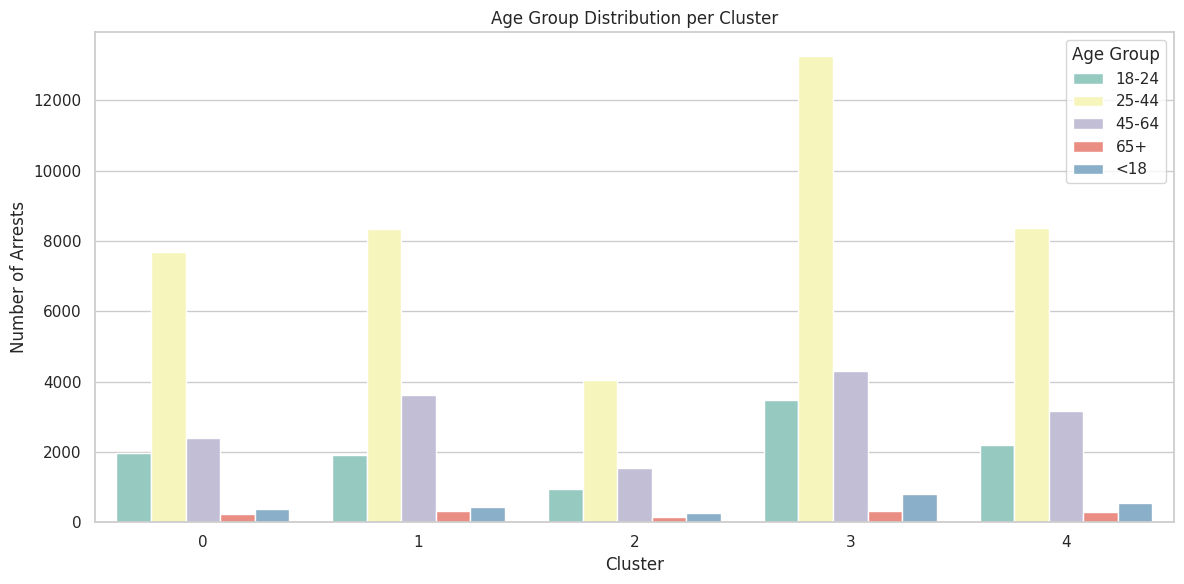

In [ ]:
# Group by cluster and AGE_GROUP
agegroup_counts = (
    df_geo.groupby(['Cluster', 'AGE_GROUP'])
    .size()
    .reset_index(name='Count')
)

# Plot: Age Group Distribution per Cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=agegroup_counts, x='Cluster', y='Count', hue='AGE_GROUP', palette='Set3')
plt.title("Age Group Distribution per Cluster")
plt.ylabel("Number of Arrests")
plt.xlabel("Cluster")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

| Cluster          | Age Group Dominance                     | Observations                                                                                                   |
| ---------------- | --------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Cluster 3**    | **25–44** dominates massively        | Cluster 3 again stands out as the most **crime-prone and active**, especially among adults in the 25–44 range. |
| **Cluster 4**    | 25–44 followed by 45–64                 | Suggests midlife adults contribute significantly to crime volume.                                              |
| **Cluster 2**    | Overall low count across all age groups | Indicates it’s a **low-crime or low-density area** (consistent with previous visuals).                         |
| **All Clusters** | 25–44 is the top age group              | Consistent with national crime trends — this age group has the highest crime involvement.                      |
| **<18 and 65+**  | Very low representation in all clusters | Minors and elderly have the **least involvement in crime**, as expected.                                       |


Conclusion – Key Takeaways
Project Goal: Analyze NYC arrest data to predict crime severity and uncover crime hotspots.

Used both Supervised (Classification) and Unsupervised (Clustering) learning for comprehensive analysis.

Random Forest outperformed Decision Tree with better accuracy and F1-scores (above 90%).

 KMeans clustering revealed 5 major crime zones, with Cluster 3 being the most crime-dense.

 25–44 age group dominates crime involvement across all clusters.

Crimes peak mid-week (Wednesday/Thursday) and decline on weekends.

Brooklyn and Queens emerged as dominant boroughs in several clusters.

 Combining both ML approaches gave insights on what crimes occur, where, when, and by whom.

 The project supports data-driven policing, resource allocation, and policy design.